**NOTE**: This notebook presents the results for testing different upper bounds for the Varying Mutator on F0 and F1 representations.

Pattern _s{num}_ denotes that the upper bound is set to _num_.
Lower bound is always set to 1.

This means that _s1.0_ is a baseline, with static mutation strength.

Varying Mutator is a mechanism that increases the explorative capability of evolutionary algorithm whenever it reaches a plateau (sever consecutive generations without MAX improvement).
It starts from strength=1 and increases it exponentianly until it reaches the upper bound.

If consecutive generations are improving, the strength is decreased exponentially until it reaches the lower bound.

The strength itself was simply implemented as applying the mutation operator multiple times. (i.e. if Varying Mutator is at strength=3, the mutation operator is applied 3 times).

If strenght is a decimal, the remaining part is used as a probability to apply the mutation operator one more time.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import interpret

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
groupped_results = interpret.import_from_dir("../results/var-mut/", lambda args: f"s{args['mutator_ub']}" + " - F" + args["genformat"])
results_df = interpret.convert_to_dataframe(groupped_results)

In [3]:
strengths = [f"s{str(s)}" for s in (1.0, 1.5, 2.0, 3.0, 5.0, 10.0)]
cols = sns.color_palette("YlGnBu")

custom_colors = dict(zip(strengths, cols))

In [4]:
results_df["strength"] = results_df["group"].apply(lambda x: x.split(" - ")[0])
results_df["format"] = results_df["group"].apply(lambda x: x.split(" - ")[1])

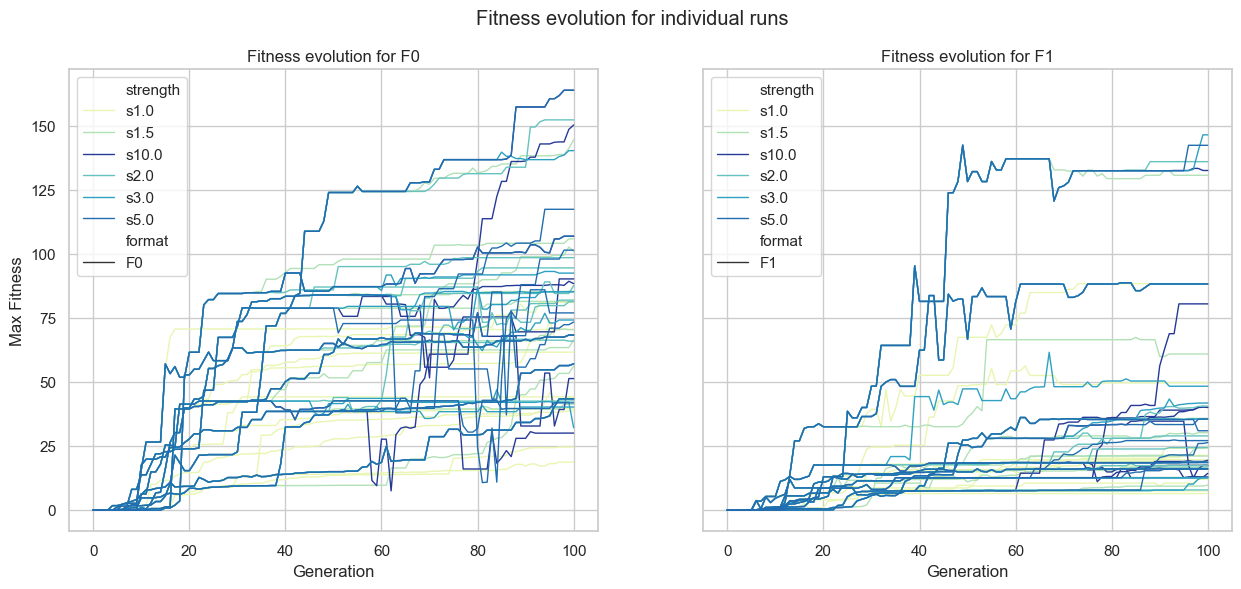

In [22]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True, sharex=True)

sns.lineplot(x="gen", y="max", hue="strength", style="format",  data=results_df[results_df.format == "F0"], units="run_idx", estimator=None, lw=1, palette=custom_colors, ax=axs[0])
sns.lineplot(x="gen", y="max", hue="strength", style="format",  data=results_df[results_df.format == "F1"], units="run_idx", estimator=None, lw=1, palette=custom_colors, ax=axs[1])
axs[0].set_title("Fitness evolution for F0")
axs[1].set_title("Fitness evolution for F1")
axs[0].set_ylabel("Max Fitness")
axs[0].set_xlabel("Generation")
axs[1].set_xlabel("Generation")

plt.suptitle("Fitness evolution for individual runs")
plt.show()

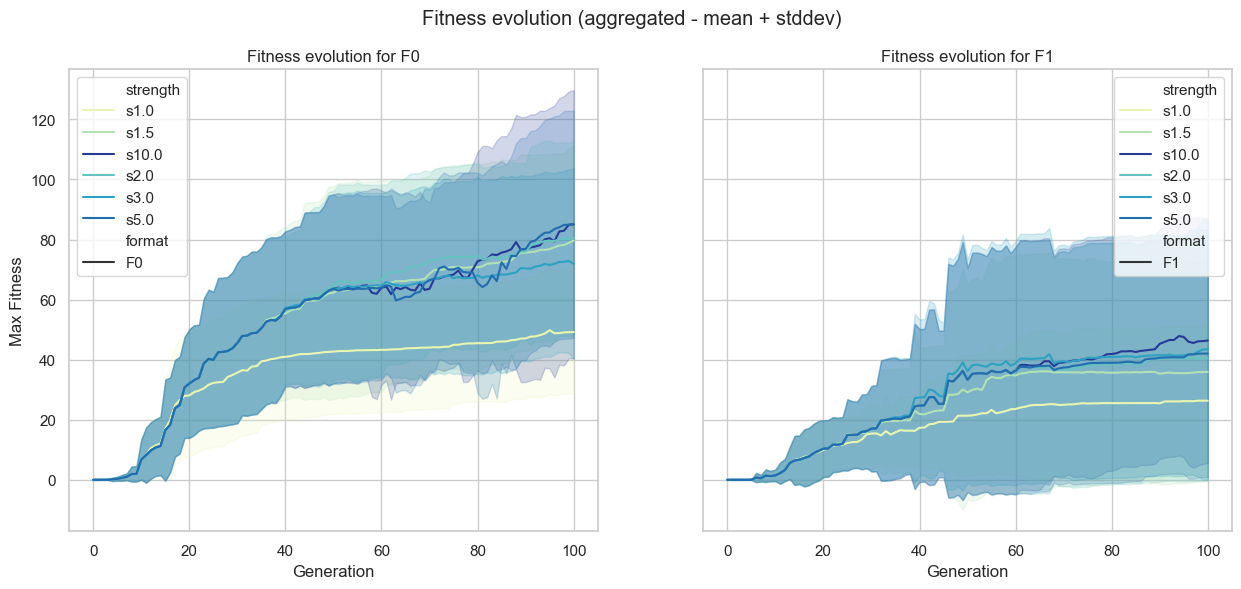

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True, sharex=True)

sns.lineplot(x="gen", y="max", hue="strength", style="format",  data=results_df[results_df.format == "F0"], errorbar="sd", palette=custom_colors, ax=axs[0])
sns.lineplot(x="gen", y="max", hue="strength", style="format",  data=results_df[results_df.format == "F1"], errorbar="sd", palette=custom_colors, ax=axs[1])
axs[0].set_title("Fitness evolution for F0")
axs[1].set_title("Fitness evolution for F1")
axs[0].set_ylabel("Max Fitness")
axs[0].set_xlabel("Generation")
axs[1].set_xlabel("Generation")

plt.suptitle("Fitness evolution (aggregated - mean + stddev)")
plt.show()

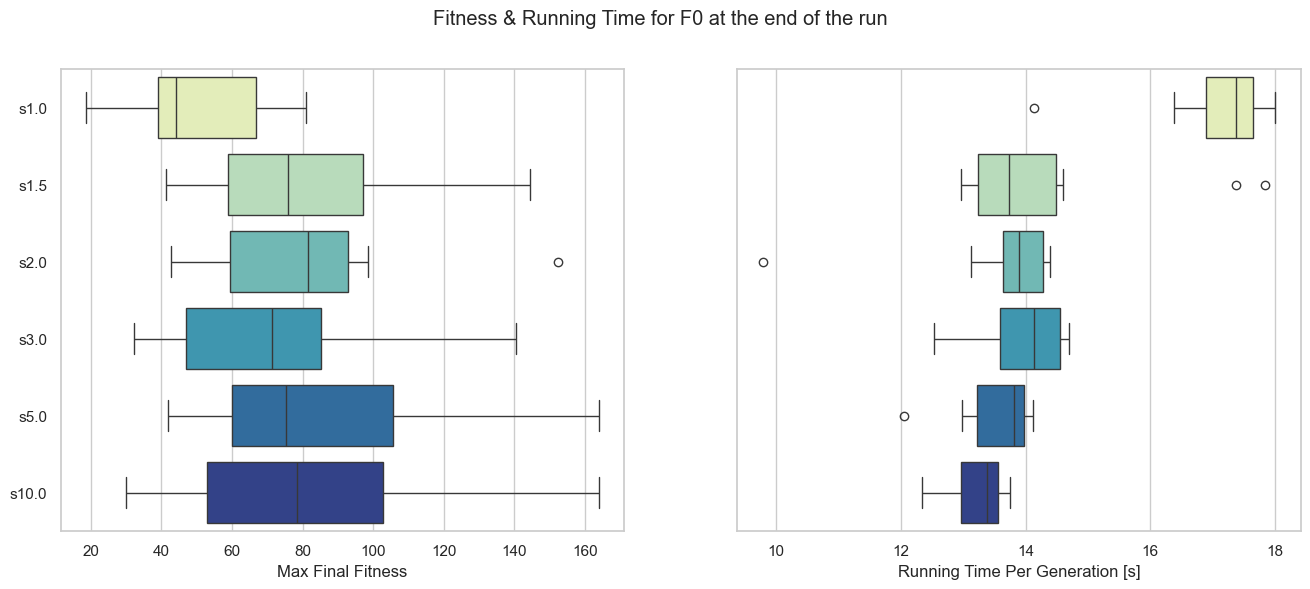

In [26]:
end_results = results_df[(results_df["gen"] == results_df["gen"].max()) & (results_df["format"] == "F0")].copy()
end_results["gen_time_s"] = end_results["time_s"] / end_results["gen"].max()
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.boxplot(y="strength", x="max", data=end_results, palette=custom_colors, hue="strength", ax=axs[0], order=strengths)
axs[0].set_ylabel("")
axs[0].set_xlabel("Max Final Fitness")
sns.boxplot(y="strength", x="gen_time_s", data=end_results, palette=custom_colors, hue="strength", ax=axs[1], order=strengths)
axs[1].set_ylabel("")
axs[1].set_xlabel("Running Time Per Generation [s]")
plt.suptitle("Fitness & Running Time for F0 at the end of the run")
plt.show()

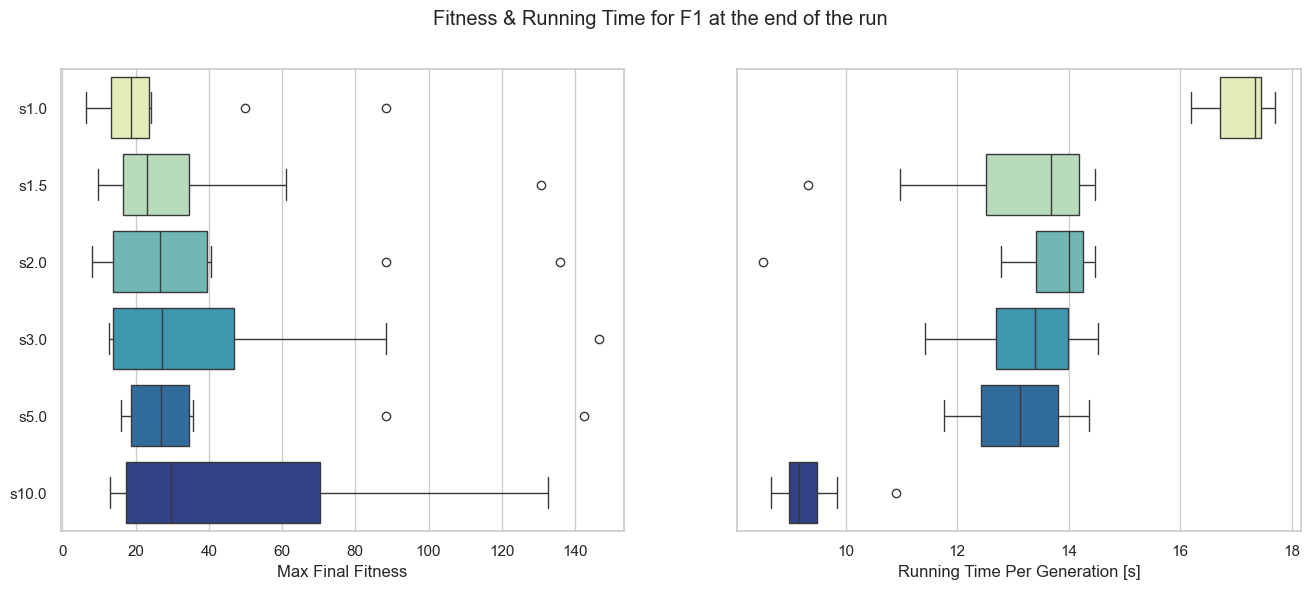

In [27]:
end_results = results_df[(results_df["gen"] == results_df["gen"].max()) & (results_df["format"] == "F1")].copy()
end_results["gen_time_s"] = end_results["time_s"] / end_results["gen"].max()
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.boxplot(y="strength", x="max", data=end_results, palette=custom_colors, hue="strength", ax=axs[0], order=strengths)
axs[0].set_ylabel("")
axs[0].set_xlabel("Max Final Fitness")
sns.boxplot(y="strength", x="gen_time_s", data=end_results, palette=custom_colors, hue="strength", ax=axs[1], order=strengths)
axs[1].set_ylabel("")
axs[1].set_xlabel("Running Time Per Generation [s]")
plt.suptitle("Fitness & Running Time for F1 at the end of the run")
plt.show()